In [2]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import requests
import json
from pandas.io.json import json_normalize

In [7]:
url = 'https://api.collection.cooperhewitt.org/rest/?method=cooperhewitt.exhibitions.getList&access_token=729cca8ffeb40cd2e725f5301e034134'
resp = requests.request('GET', url)
exhibition = json.loads(resp.text)
exhibition = pd.json_normalize(exhibition['exhibitions'])
exhibition['date_start'] = pd.to_datetime(exhibition['date_start'])
exhibition['date_end'].replace('0000-00-00', '2020-12-30', inplace=True)
exhibition['date_end'] = pd.to_datetime(exhibition['date_end'])
# exhibition.set_index(keys= ['date_start', 'title'], inplace=True)

db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

# pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
# pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
# pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
# pensActivity['created'].replace(0, np.nan, inplace=True)
# pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
# pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
# pensActivity['notes'] = pensActivity['notes'].astype('category')
# pensActivity.sort_values(by='created', inplace=True)

pensCheckouts = pd.read_sql('SELECT * FROM PensCheckouts', con=db_connection)
pensCheckouts['start'] = pd.to_datetime(pensCheckouts['start'], unit='s')
pensCheckouts['start'].replace(0, np.nan, inplace=True)
pensCheckouts['end'].replace(0, np.nan, inplace=True)
pensCheckouts['end'] = pd.to_datetime(pensCheckouts['end'], unit='s')
pensCheckouts['start_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['end_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['start_ip'] = pensCheckouts['start_ip'].astype('category')
pensCheckouts['end_ip'] = pensCheckouts['end_ip'].astype('category')
pensCheckouts.set_index('id', inplace=True)
pensCheckouts.sort_index(inplace=True)
###DROPED COLUMNS####
pensCheckouts.drop(['start_ip', 'end_ip'], axis=1, inplace=True)

In [4]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)

In [73]:
# checkout_monthly_value = pensCheckouts['start'].groupby(pensCheckouts.start.dt.to_period("M")).agg('count')
# checkout_monthly_value

start
2014-10       20
2014-11      154
2014-12       63
2015-01       30
2015-02      126
2015-03     8768
2015-04    14520
2015-05    12994
2015-06     9820
2015-07    12118
2015-08    11676
2015-09     9971
2015-10    12910
2015-11    14119
2015-12    14705
2016-01    13557
2016-02    15110
2016-03    11464
2016-04     8712
2016-05     3643
2016-06     7207
2016-07     7806
2016-08    14260
2016-09    14339
2016-10     9634
2016-11    10561
2016-12    13641
2017-01    12883
2017-02    11836
2017-03    10782
2017-04    14874
2017-05     4574
2017-06     5335
2017-07     8201
2017-08     8309
2017-09     7031
2017-10     4389
2017-11     4336
2017-12     6251
2018-01     9334
2018-02     6242
2018-03     5185
2018-04     5467
2018-05     7045
2018-06    11483
2018-07     9997
2018-08    11581
2018-09     9210
2018-10     7958
2018-11     8321
2018-12     7006
2019-01      447
2019-02     7293
2019-03     3404
2019-04     6654
2019-05     6255
2019-06     8468
2019-07    12042
2019-08 

In [5]:
# activity_monthly_value = pensActivity['created'].groupby(pensActivity.created.dt.to_period("M")).agg('count')
# activity_monthly_value

created
2014-12       52
2015-01       27
2015-02      760
2015-03    16414
2015-04    19576
2015-05    15887
2015-06    11692
2015-07    16733
2015-08    16572
2015-09    13587
2015-10    16888
2015-11    19180
2015-12    19972
2016-01    19412
2016-02    22013
2016-03    27818
2016-04    31879
2016-05    30390
2016-06    26796
2016-07    35738
2016-08    30167
2016-09    20151
2016-10    21140
2016-11    19821
2016-12    20671
2017-01    18362
2017-02    17751
2017-03    15709
2017-04    20478
2017-05    16667
2017-06    15997
2017-07    21676
2017-08    19871
2017-09    13369
2017-10    11499
2017-11    10471
2017-12    12546
2018-01    10885
2018-02     7178
2018-03     8259
2018-04     8364
2018-05     9805
2018-06     5214
2018-07    12601
2018-08    12162
2018-09     9289
2018-10    10076
2018-11     7932
2018-12     9453
2019-01      913
2019-02     8018
2019-03     8002
2019-04     6364
2019-05     7975
2019-06     8804
2019-07    12500
2019-08    11695
2019-09     8748
2019-1

In [26]:
# join_monthly_value = pd.concat([checkout_monthly_value, activity_monthly_value], axis=1)
# join_monthly_value = join_monthly_value.rename({'start': 'checkout_counts', 'created': 'activity_counts'}, axis=1)
# join_monthly_value.reset_index(inplace=True)
# join_monthly_value =join_monthly_value.rename({"index": "date_start"}, axis=1)
# join_monthly_value

,date_start,checkout_counts,activity_counts
0,2014-10,20.0,NaN
1,2014-11,154.0,NaN
2,2014-12,63.0,52.0
3,2015-01,30.0,27.0
4,2015-02,126.0,760.0
5,2015-03,8768.0,16414.0
6,2015-04,14520.0,19576.0
7,2015-05,12994.0,15887.0
8,2015-06,9820.0,11692.0
9,2015-07,12118.0,16733.0


In [27]:
# join_monthly_value['date_start'] = join_monthly_value['date_start'].astype('str')
# join_monthly_value

,date_start,checkout_counts,activity_counts
0,2014-10,20.0,NaN
1,2014-11,154.0,NaN
2,2014-12,63.0,52.0
3,2015-01,30.0,27.0
4,2015-02,126.0,760.0
5,2015-03,8768.0,16414.0
6,2015-04,14520.0,19576.0
7,2015-05,12994.0,15887.0
8,2015-06,9820.0,11692.0
9,2015-07,12118.0,16733.0


In [36]:
# exhibition['date_start'] = pd.DatetimeIndex(exhibition['date_start']).to_period("M")

In [37]:
# exhibition_date = exhibition[['date_start', 'title']]
# # exhibition_date.set_index(['date_start'], inplace=True)
# exhibition_date = exhibition_date[exhibition_date['date_start'] >= '2014-10-01']
# exhibition_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   date_start  54 non-null     period[M]
 1   title       54 non-null     object   
dtypes: object(1), period[M](1)
memory usage: 1.3+ KB


In [38]:
# exhibition_date['date_start'] = exhibition_date['date_start'].astype('str')
# exhibition_date

In [17]:
# exhibition_item_collect = pd.merge(exhibition_date, join_monthly_value, on= 'date_start', right_index=True, left_index=True)
# exhibition_item_collect.sort_values(by='date_start')

,date_start,title,checkout_counts,activity_counts
53,2014-12-12,Beautiful Users,3404.0,8002.0
48,2014-12-12,Hewitt Sisters Collect,7958.0,10076.0
49,2014-12-12,Making Design,8321.0,7932.0
52,2014-12-12,Tools: Extending Our Reach,7293.0,8018.0
51,2014-12-12,Maira Kalman Selects,447.0,913.0
50,2014-12-12,"Passion for the Exotic: Lockwood de Forest, Fr...",7006.0,9453.0
47,2015-04-17,How Posters Work,9210.0,9289.0
46,2015-06-19,David Adjaye Selects: Works from the Permanent...,11581.0,12162.0
45,2015-06-24,Provocations: The Architecture and Design of H...,9997.0,12601.0
44,2015-10-08,Pixar: The Design of Story,11483.0,5214.0


In [18]:
# exhibition_item_collect.set_index(keys=['date_start', 'title'])

checkout_counts  \
date_start title                                                                 
2020-03-13 Willi Smith: Street Couture                                    20.0   
2020-02-28 Contemporary Muslim Fashions                                  154.0   
2019-12-07 Botanical Expressions                                          63.0   
2019-11-16 Herbert Bayer: Bauhaus Master                                  30.0   
           After Icebergs                                                126.0   
           Nature by Design: Cochineal                                  8768.0   
2019-09-20 Face Values: Exploring Artificial Intelligence              14520.0   
2019-07-12 Collection Selects: Wyss Institute                          12994.0   
2019-06-08 Plastics                                                     9820.0   
           Botanical Lessons                                           12118.0   
           Bathing Beautiful                                           11676.0   
2019-05-10 Nature—Cooper Hewitt Design Triennial                        9971.0   
2019-04-12 Paisley                                                     12910.0   
2019-03-30 Embroidered and Embellished                                 14119.0   
           Katagami                                                    14705.0   
2018-12-14 The Road Ahead: Reimagining Mobility                        13557.0   
2018-10-05 Rebeca Méndez Selects                                       15110.0   
2018-09-14 Process Lab: Scholten & Baijings                            11464.0   
2018-07-28 Iridescence                                                  8712.0   
2018-06-09 Color Decoded: The Textiles of Richard Landis                3643.0   
2018-05-04 Saturated: The Allure and Science of Color                   7207.0   
2018-02-23 Bob Greenberg Selects                                        7806.0   
2017-12-15 Access+Ability                                              14260.0   
2017-11-10 Jewelry of Ideas: Gifts from the Susan Grant Le...          14339.0   
2017-10-13 Hear, See, Play: Designing with Sound                        9634.0   
2017-10-06 Ilonka Karasz, Works from the Collection                    10561.0   
2017-09-27 Joris Laarman Lab: Design in the Digital Age                13641.0   
2017-09-09 Passion for the Exotic: Japonism                            12883.0   
2017-09-06 The Virtue in Vice                                          11836.0   
2017-06-09 Esperanza Spalding Selects                                  10782.0   
2017-05-19 Making | Breaking: New Arrivals                             14874.0   
2017-04-07 Jeweled Splendors of the Art Deco Era: The Prin...           4574.0   
           The Jazz Age: American Style in the 1920s                    5335.0   
2017-02-03 The World of Radio                                           8201.0   
2016-11-11 Ellen DeGeneres Selects                                      8309.0   
2016-09-30 Process Lab: Citizen Design                                  7031.0   
           By the People: Designing a Better America                    4389.0   
2016-09-23 Scraps                                                       4336.0   
2016-06-10 Fragile Beasts                                               6251.0   
2016-04-28 Energizing the Everyday: Gifts From the George ...           9334.0   
2016-03-12 Passion for the Exotic: Louis Comfort Tiffany a...           6242.0   
2016-03-04 Thom Browne Selects                                          5185.0   
2016-02-12 Beauty—Cooper Hewitt Design Triennial                        5467.0   
2015-12-04 Making Design: Recent Acquisitions                           7045.0   
2015-10-08 Pixar: The Design of Story                                  11483.0   
2015-06-24 Provocations: The Architecture and Design of He...           9997.0   
2015-06-19 David Adjaye Selects: Works from the Permanent ...          11581.0   
2015-04-17 How Posters Work                  

In [51]:
# exhibition_activity = exhibition_date.merge(join_monthly_value, how='inner', on='date_start')
# exhibition_activity.set_index(keys=['date_start', 'title'], inplace=True)
# exhibition_activity

checkout_counts  \
date_start title                                                                 
2020-03    Willi Smith: Street Couture                                   854.0   
2020-02    Contemporary Muslim Fashions                                 7595.0   
2019-12    Botanical Expressions                                        9811.0   
2019-11    Herbert Bayer: Bauhaus Master                                8717.0   
           After Icebergs                                               8717.0   
           Nature by Design: Cochineal                                  8717.0   
2019-09    Face Values: Exploring Artificial Intelligence               8502.0   
2019-07    Collection Selects: Wyss Institute                          12042.0   
2019-06    Plastics                                                     8468.0   
           Botanical Lessons                                            8468.0   
           Bathing Beautiful                                            8468.0   
2019-05    Nature—Cooper Hewitt Design Triennial                        6255.0   
2019-04    Paisley                                                      6654.0   
2019-03    Embroidered and Embellished                                  3404.0   
           Katagami                                                     3404.0   
2018-12    The Road Ahead: Reimagining Mobility                         7006.0   
2018-10    Rebeca Méndez Selects                                        7958.0   
2018-09    Process Lab: Scholten & Baijings                             9210.0   
2018-07    Iridescence                                                  9997.0   
2018-06    Color Decoded: The Textiles of Richard Landis               11483.0   
2018-05    Saturated: The Allure and Science of Color                   7045.0   
2018-02    Bob Greenberg Selects                                        6242.0   
2017-12    Access+Ability                                               6251.0   
2017-11    Jewelry of Ideas: Gifts from the Susan Grant Le...           4336.0   
2017-10    Hear, See, Play: Designing with Sound                        4389.0   
           Ilonka Karasz, Works from the Collection                     4389.0   
2017-09    Joris Laarman Lab: Design in the Digital Age                 7031.0   
           Passion for the Exotic: Japonism                             7031.0   
           The Virtue in Vice                                           7031.0   
2017-06    Esperanza Spalding Selects                                   5335.0   
2017-05    Making | Breaking: New Arrivals                              4574.0   
2017-04    Jeweled Splendors of the Art Deco Era: The Prin...          14874.0   
           The Jazz Age: American Style in the 1920s                   14874.0   
2017-02    The World of Radio                                          11836.0   
2016-11    Ellen DeGeneres Selects                                     10561.0   
2016-09    Process Lab: Citizen Design                                 14339.0   
           By the People: Designing a Better America                   14339.0   
           Scraps                                                      14339.0   
2016-06    Fragile Beasts                                               7207.0   
2016-04    Energizing the Everyday: Gifts From the George ...           8712.0   
2016-03    Passion for the Exotic: Louis Comfort Tiffany a...          11464.0   
           Thom Browne Selects                                         11464.0   
2016-02    Beauty—Cooper Hewitt Design Triennial                       15110.0   
2015-12    Making Design: Recent Acquisitions                          14705.0   
2015-10    Pixar: The Design of Story                                  12910.0   
2015-06    Provocations: The Architecture and Design of He...           9820.0   
           David Adjaye Selects: Works from the Permanent ...           9820.0   
2015-04    How Posters Work                  

In [62]:
# duplicates_activity = exhibition_activity.duplicated('activity_counts')
# exhibition_activity.loc[duplicates_activity, ['checkout_counts','activity_counts']] = np.NaN
# exhibition_activity

checkout_counts  \
date_start title                                                                 
2020-03    Willi Smith: Street Couture                                   854.0   
2020-02    Contemporary Muslim Fashions                                 7595.0   
2019-12    Botanical Expressions                                        9811.0   
2019-11    Herbert Bayer: Bauhaus Master                                8717.0   
           After Icebergs                                                  NaN   
           Nature by Design: Cochineal                                     NaN   
2019-09    Face Values: Exploring Artificial Intelligence               8502.0   
2019-07    Collection Selects: Wyss Institute                          12042.0   
2019-06    Plastics                                                     8468.0   
           Botanical Lessons                                               NaN   
           Bathing Beautiful                                               NaN   
2019-05    Nature—Cooper Hewitt Design Triennial                        6255.0   
2019-04    Paisley                                                      6654.0   
2019-03    Embroidered and Embellished                                  3404.0   
           Katagami                                                        NaN   
2018-12    The Road Ahead: Reimagining Mobility                         7006.0   
2018-10    Rebeca Méndez Selects                                        7958.0   
2018-09    Process Lab: Scholten & Baijings                             9210.0   
2018-07    Iridescence                                                  9997.0   
2018-06    Color Decoded: The Textiles of Richard Landis               11483.0   
2018-05    Saturated: The Allure and Science of Color                   7045.0   
2018-02    Bob Greenberg Selects                                        6242.0   
2017-12    Access+Ability                                               6251.0   
2017-11    Jewelry of Ideas: Gifts from the Susan Grant Le...           4336.0   
2017-10    Hear, See, Play: Designing with Sound                        4389.0   
           Ilonka Karasz, Works from the Collection                        NaN   
2017-09    Joris Laarman Lab: Design in the Digital Age                 7031.0   
           Passion for the Exotic: Japonism                                NaN   
           The Virtue in Vice                                              NaN   
2017-06    Esperanza Spalding Selects                                   5335.0   
2017-05    Making | Breaking: New Arrivals                              4574.0   
2017-04    Jeweled Splendors of the Art Deco Era: The Prin...          14874.0   
           The Jazz Age: American Style in the 1920s                       NaN   
2017-02    The World of Radio                                          11836.0   
2016-11    Ellen DeGeneres Selects                                     10561.0   
2016-09    Process Lab: Citizen Design                                 14339.0   
           By the People: Designing a Better America                       NaN   
           Scraps                                                          NaN   
2016-06    Fragile Beasts                                               7207.0   
2016-04    Energizing the Everyday: Gifts From the George ...           8712.0   
2016-03    Passion for the Exotic: Louis Comfort Tiffany a...          11464.0   
           Thom Browne Selects                                             NaN   
2016-02    Beauty—Cooper Hewitt Design Triennial                       15110.0   
2015-12    Making Design: Recent Acquisitions                          14705.0   
2015-10    Pixar: The Design of Story                                  12910.0   
2015-06    Provocations: The Architecture and Design of He...           9820.0   
           David Adjaye Selects: Works from the Permanent ...              NaN   
2015-04    How Posters Work                  

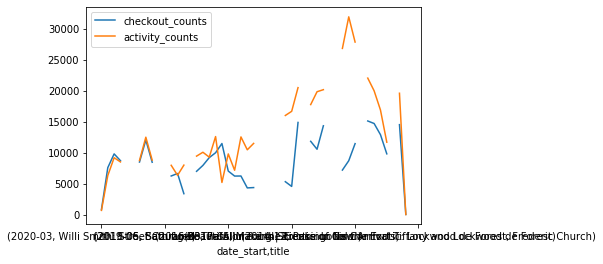

In [72]:
# exhibition_activity.plot(use_index='date_start')

In [21]:
exhibition_date = exhibition[exhibition['date_start'] >= '2014-10-01']

In [5]:
def get_checkout_counts(exhibit):
    start= exhibit['date_start']
    end= exhibit['date_end']
    pensCheckouts_count = pensCheckouts[(pensCheckouts['start'] >=start) & (pensCheckouts['start'] <= end)]
    return pensCheckouts_count['pen_id'].count()

In [22]:
exhibition_date['count'] = exhibition_date.apply(get_checkout_counts, axis=1)
exhibition_date

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,url,title,text,date_start,date_end,is_active,count
0,2318802364,https://collection.cooperhewitt.org/exhibition...,Willi Smith: Street Couture,\r\nDuring his twenty-year career Willi Smith ...,2020-03-13,2020-12-30,1,36
1,2318802212,https://collection.cooperhewitt.org/exhibition...,Contemporary Muslim Fashions,Contemporary Muslim Fashions is the first majo...,2020-02-28,2020-12-30,1,1499
2,1159161457,https://collection.cooperhewitt.org/exhibition...,Botanical Expressions,"\r\nAt the turn of the 20th century, the inter...",2019-12-07,2020-12-30,1,26222
3,2318800172,https://collection.cooperhewitt.org/exhibition...,Herbert Bayer: Bauhaus Master,"Herbert Bayer (American, born Austria, active ...",2019-11-16,2020-12-30,1,32063
4,1159161451,https://collection.cooperhewitt.org/exhibition...,After Icebergs,"In the summer of 1859, Frederic Edwin Church (...",2019-11-16,2020-12-30,1,32063
5,2318800145,https://collection.cooperhewitt.org/exhibition...,Nature by Design: Cochineal,"American cochineal [Dactylopius coccus], a sma...",2019-11-16,2020-12-30,1,32063
6,2318800018,https://collection.cooperhewitt.org/exhibition...,Face Values: Exploring Artificial Intelligence,Computers now complete many tasks that formerl...,2019-09-20,2020-12-30,1,45624
7,2318799994,https://collection.cooperhewitt.org/exhibition...,Collection Selects: Wyss Institute,The Wyss Institute for Biologically Inspired E...,2019-07-12,2020-12-30,1,70374
8,1159161445,https://collection.cooperhewitt.org/exhibition...,Plastics,\r\nNature By Design: Plastics\r\n\r\nFrom mol...,2019-06-08,2020-12-30,1,80863
9,1159161455,https://collection.cooperhewitt.org/exhibition...,Botanical Lessons,\r\nBotanical Lessons explores the 19th-centur...,2019-06-08,2020-12-30,0,80863


In [24]:
exhibition_checkouts = exhibition_date[['date_start', 'date_end', 'title', 'id', 'count' ]]
exhibition_checkouts.set_index(keys=['date_start'], inplace=True)

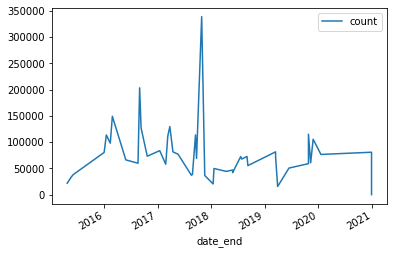

In [25]:
exhibition_checkouts.plot(x='date_end', y='count')

In [26]:
exhibition_checkouts

,date_end,title,id,count
date_start,,,,
2020-03-13,2020-12-30,Willi Smith: Street Couture,2318802364,36
2020-02-28,2020-12-30,Contemporary Muslim Fashions,2318802212,1499
2019-12-07,2020-12-30,Botanical Expressions,1159161457,26222
2019-11-16,2020-12-30,Herbert Bayer: Bauhaus Master,2318800172,32063
2019-11-16,2020-12-30,After Icebergs,1159161451,32063
2019-11-16,2020-12-30,Nature by Design: Cochineal,2318800145,32063
2019-09-20,2020-12-30,Face Values: Exploring Artificial Intelligence,2318800018,45624
2019-07-12,2020-12-30,Collection Selects: Wyss Institute,2318799994,70374
2019-06-08,2020-12-30,Plastics,1159161445,80863
